**Exponential Weighted Average/Exponential Moving Average/Exponential Smoothing**

EWA is technique for smoothing time series data using the exponential window function. The recursion for EWA is given by
<br><br>
\begin{cases}
s_0 &= x_0\\
s_t &= \alpha x_t + (1 - \alpha)s_{t-1}, && t > 0
\end{cases}
<br><br>
$\alpha$ is called the exponential factor with $\alpha \in (0,1)$

In [4]:
import numpy as np

#Calculates based on per element basis and put the result n a vector s
def ewa_recursive(x, alpha, s0=None):
    x = np.asarray(x, dtype=float)

    if not (0 < alpha < 1):
        raise ValueError("alpha must be in (0, 1)")

    #Initialize vector s
    s = np.zeros_like(x)

    #Initial condition
    s[0] = x[0] if s0 is None else s0


    #Recursion
    for t in range(1, len(x)):
        s[t] = alpha * s[t - 1] + (1 - beta) * x[t]

    return s


In [5]:
#vectorized
def ewa_vectorized(x, beta):
    """
    Vectorized EWA using convolution weights
    """
    x = np.asarray(x, dtype=float)
    n = len(x)

    weights = (1 - beta) * beta ** np.arange(n)
    weights = weights[::-1]

    return np.convolve(x, weights, mode='full')[:n]


In [6]:
#Bias Corrected
def ewa_bias_corrected(x, beta, s0=0.0):
    """
    Bias-corrected exponentially weighted average
    """
    x = np.asarray(x, dtype=float)
    s = np.zeros_like(x)
    s[0] = s0

    for t in range(1, len(x)):
        s[t] = beta * s[t - 1] + (1 - beta) * x[t]

    t = np.arange(1, len(x) + 1)
    s_hat = s / (1 - beta ** t)

    return s_hat


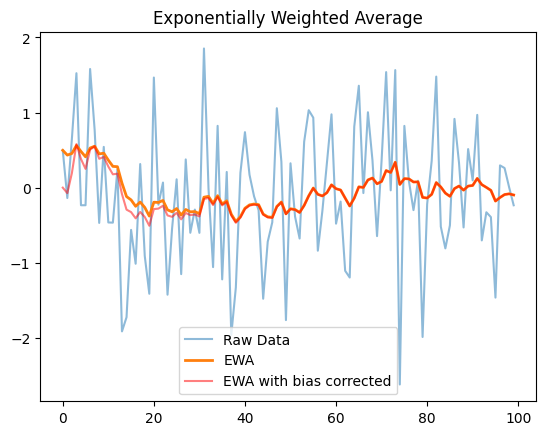

In [9]:
import matplotlib.pyplot as plt

# Sample noisy signal
np.random.seed(42)
x = np.random.randn(100)

beta = 0.9
ewa = ewa_recursive(x, beta)
ewa_bias_corr = ewa_bias_corrected(x, beta, s0=0.0)

plt.plot(x, label="Raw Data", alpha=0.5)
plt.plot(ewa, label="EWA", linewidth=2)
plt.plot(ewa_bias_corr, label = "EWA with bias corrected", color = 'red', alpha = 0.5)
plt.legend()
plt.title("Exponentially Weighted Average")
plt.show()


**Exponential Moving Average in Stock Market Prices**

Let $P_t$ be the price at time $t$, then
<br><br>
$$
\text{EMA}_t = \alpha P_t + (1 - \alpha) \text{EMA}_{t-1}
$$
<br><br>
With $\alpha = \dfrac{2}{N + 1}$


In [12]:
def EMA(prices, period):
  alpha = 2/(1 + period)
  ema_vals = np.zeros_like(prices, dtype = float)

  #Initial value
  ema_vals[0] = prices[0]

  for t in range(1, len(prices)):
    ema_vals[t] = alpha * prices[t] + (1 - alpha) * ema_vals[t - 1]

  return ema_vals

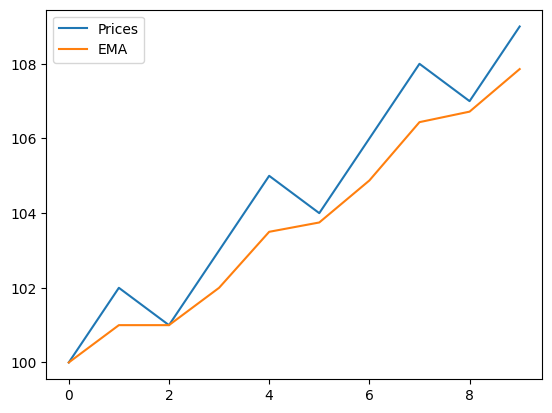

In [14]:
#Example
prices = np.array([100,102,101,103,105,104,106,108,107,109])
period = 3
ema_vals = EMA(prices, period)

plt.plot(prices, label = 'Prices')
plt.plot(ema_vals, label = 'EMA')
plt.legend()
plt.show()

**Data Scraping from Public Websites**

In [20]:
!pip install yfinance pandas matplotlib



In [56]:
import yfinance as yf
import pandas as pd

# Download SPX500 data
spx = yf.download(
    "^GSPC",
    start="2000-01-01",
    end="2025-01-01",
    interval="1d"
)

print(spx.head())


/tmp/ipython-input-112934615.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spx = yf.download(
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000


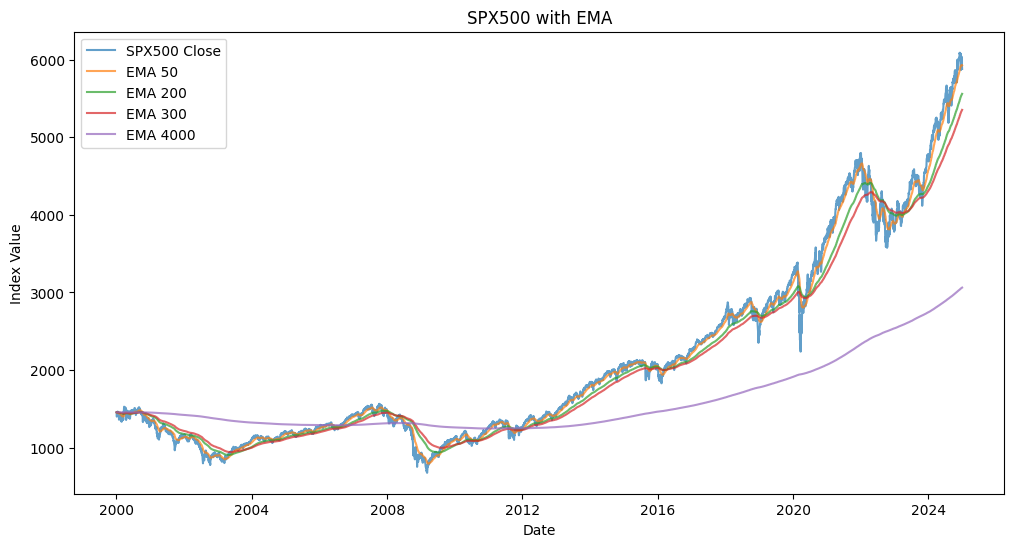

In [57]:
spx["EMA_50"] = spx["Close"].ewm(span=50, adjust=False).mean()
spx["EMA_200"] = spx["Close"].ewm(span=200, adjust=False).mean()
spx["EMA_300"] = spx["Close"].ewm(span=300, adjust=False).mean()
spx["EMA_4000"] = spx["Close"].ewm(span=4000, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(spx["Close"], label="SPX500 Close", alpha=0.7)
plt.plot(spx["EMA_50"], label="EMA 50", alpha=0.7)
plt.plot(spx["EMA_200"], label="EMA 200", alpha=0.7)
plt.plot(spx["EMA_300"], label="EMA 300", alpha=0.7)
plt.plot(spx["EMA_4000"], label="EMA 4000", alpha=0.7)

plt.legend()
plt.title("SPX500 with EMA")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.show()
